# Unsupervised Machine Learning - KMeans

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: 
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

![kmeans.png](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52579/versions/9/screenshot.jpg)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [59]:
# Take make moons in built dataset

data_ = datasets.make_moons(200)

In [60]:
# check the dataset

data_

(array([[-8.73849377e-01,  4.86196736e-01],
        [ 6.78509412e-01,  7.34591709e-01],
        [-2.35758936e-01,  9.71811568e-01],
        [-6.54860734e-01,  7.55749574e-01],
        [ 1.11083820e+00, -4.93838464e-01],
        [ 1.97542979e+00,  2.79689467e-01],
        [-7.23734038e-01,  6.90079011e-01],
        [ 9.52418084e-01, -4.98867339e-01],
        [-6.05609687e-01,  7.95761841e-01],
        [ 1.26150623e-01,  1.38032639e-02],
        [ 3.94390313e-01, -2.95761841e-01],
        [ 2.01332353e-03,  4.36576080e-01],
        [ 2.54735550e-01, -1.66769001e-01],
        [ 3.69447333e-01, -2.76146464e-01],
        [ 1.96794870e+00,  2.48852013e-01],
        [ 3.86345126e-01,  9.22354294e-01],
        [ 4.72774532e-01, -3.49725430e-01],
        [ 6.13654874e-01, -4.22354294e-01],
        [ 7.66044443e-01,  6.42787610e-01],
        [ 7.64241064e-01, -4.71811568e-01],
        [ 1.91610846e+00,  9.90694646e-02],
        [-7.86053095e-01,  6.18158986e-01],
        [-8.57983413e-01,  5.136

In [61]:
# create input dataframe

inputData = pd.DataFrame(data = data_[0])

In [62]:
inputData.head()

,0,1
0,-0.873849,0.486197
1,0.678509,0.734592
2,-0.235759,0.971812
3,-0.654861,0.755750
4,1.110838,-0.493838


In [63]:
# create output dataframe

outputData = pd.DataFrame(data = data_[1])
outputData.head()

,0
0,0
1,0
2,0
3,0
4,1


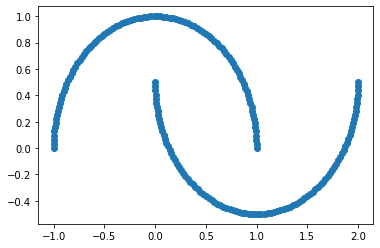

In [64]:
# create a scatter plot for inputData set

plt.scatter(inputData[0], inputData[1])

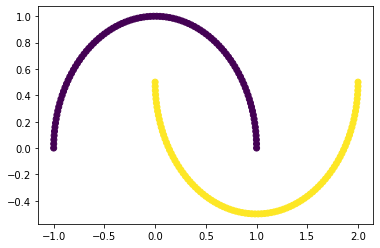

In [65]:
# create a scatter plot for inputData set with outputData color

plt.scatter(inputData[0], inputData[1], c = outputData)

In [73]:
# Call the sklearn Kmeans and make a model with 200 samples
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(inputData)


#model_fit


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
# check for labels

model.labels_

array([1, 0, 4, 1, 3, 2, 1, 3, 1, 3, 3, 4, 3, 3, 2, 4, 3, 3, 0, 3, 2, 1,
       1, 2, 2, 3, 1, 4, 4, 0, 4, 0, 0, 1, 1, 0, 4, 4, 4, 2, 4, 2, 4, 0,
       1, 2, 4, 2, 0, 2, 3, 2, 1, 3, 1, 3, 4, 4, 3, 3, 2, 1, 3, 0, 0, 1,
       4, 4, 4, 0, 3, 0, 2, 0, 4, 1, 2, 0, 1, 4, 2, 3, 3, 3, 4, 2, 2, 0,
       2, 1, 3, 1, 4, 2, 3, 2, 1, 2, 3, 1, 3, 0, 1, 3, 3, 1, 1, 1, 3, 4,
       1, 2, 0, 4, 1, 1, 2, 0, 4, 4, 4, 3, 4, 2, 2, 3, 2, 4, 0, 3, 0, 3,
       0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 3, 0, 3, 0, 3, 2, 1, 2, 4, 3, 2, 2,
       4, 4, 3, 3, 2, 3, 2, 3, 2, 3, 2, 4, 3, 2, 1, 0, 3, 2, 4, 0, 4, 2,
       4, 2, 4, 2, 3, 3, 3, 4, 4, 1, 2, 4, 1, 4, 4, 1, 4, 0, 2, 2, 2, 4,
       1, 1], dtype=int32)

In [75]:
from sklearn import metrics

In [79]:
# call metrics and check silhoutte score

metrics.silhouette_score(inputData, model.labels_)

0.49207421235790266

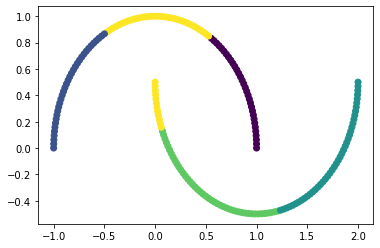

In [76]:
# create a scatter plot for inputData set with model labels color

plt.scatter(inputData[0], inputData[1], c = model.labels_)

#### finding right number of cluster

In [77]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

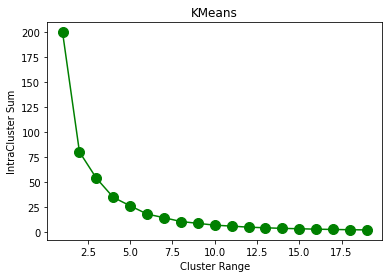

In [78]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()